In [5]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
birthDF = pd.read_csv('data/daily-total-female-births.txt', 
                      index_col='Date', parse_dates=['Date'] )
birthDF

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [7]:
birthDF.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [8]:
tempDF = pd.read_csv('data/daily-min-temperatures.csv',
                    index_col='date', parse_dates=['date'])
tempDF

,Temp
date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [9]:
airDF = pd.read_csv('data/international-airline-passengers.txt',
                   index_col='time', parse_dates=['time'])
airDF

,passengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [10]:
n = len(birthDF)//2
n

182

## stationary

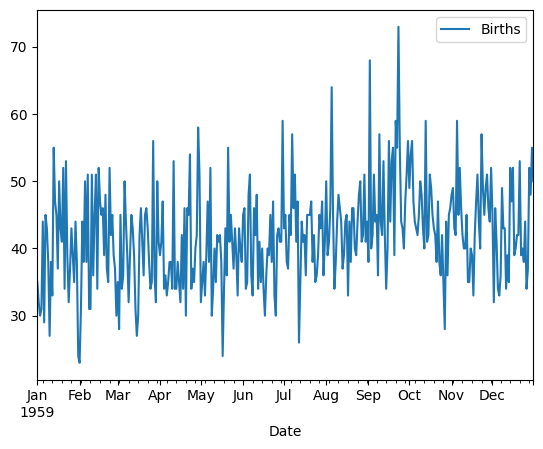

In [11]:
birthDF.plot( )
plt.show()

In [12]:
print( birthDF.iloc[:n].mean() )
print( birthDF.iloc[:n].var() )

Births    39.763736
dtype: float64
Births    49.485308
dtype: float64


In [13]:
print( birthDF.iloc[n:].mean() )
print( birthDF.iloc[n:].var() )

Births    44.185792
dtype: float64
Births    48.976281
dtype: float64


### non stationary

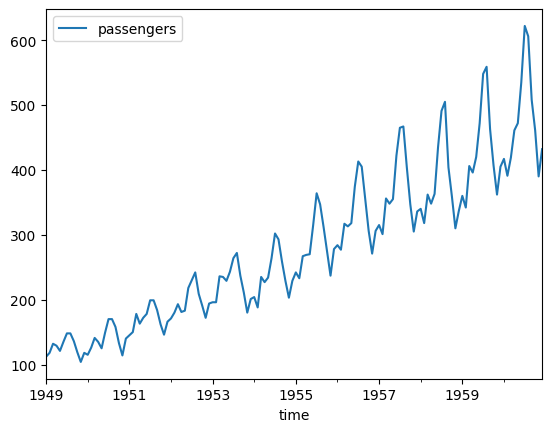

In [14]:
airDF.plot()
plt.show()

In [15]:
n = len(airDF)//2

In [16]:
print( airDF.iloc[:n].mean() )
print( airDF.iloc[:n].var() )

passengers    182.902778
dtype: float64
passengers    2275.69464
dtype: float64


In [17]:
print( airDF.iloc[n:].mean() )
print( airDF.iloc[n:].var() )

passengers    377.694444
dtype: float64
passengers    7471.736307
dtype: float64


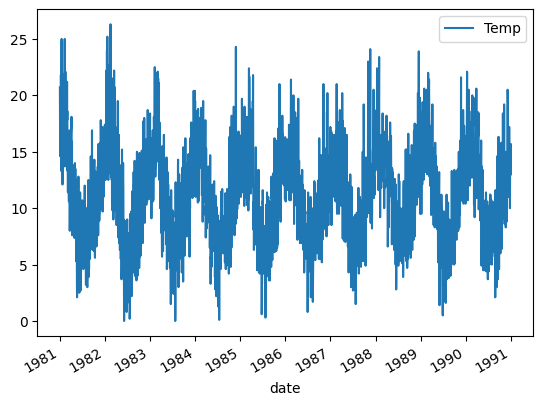

In [18]:
tempDF.plot()
plt.show()

In [19]:
tempDF['days'] = range(0, len(tempDF))

In [20]:
tempDF

,Temp,days
date,,
1981-01-01,20.7,0
1981-01-02,17.9,1
1981-01-03,18.8,2
1981-01-04,14.6,3
1981-01-05,15.8,4
...,...,...
1990-12-27,14.0,3645
1990-12-28,13.6,3646
1990-12-29,13.5,3647


In [21]:
temps = tempDF['Temp'].values
temps

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

In [22]:
temps[1:]

array([17.9, 18.8, 14.6, ..., 13.5, 15.7, 13. ])

In [23]:
temps[:-1]

array([20.7, 17.9, 18.8, ..., 13.6, 13.5, 15.7])

In [24]:
np.corrcoef( temps[1:] ,temps[:-1] ) #lag 1

array([[1.        , 0.77487022],
       [0.77487022, 1.        ]])

In [25]:
np.corrcoef( temps[2:] ,temps[:-2] ) #lag 2

array([[1.        , 0.63111946],
       [0.63111946, 1.        ]])

In [26]:
np.corrcoef( temps[3:] ,temps[:-3] ) #lag 3

array([[1.        , 0.58637486],
       [0.58637486, 1.        ]])

In [27]:
np.corrcoef( temps[3:] ,temps[:-3] )[0,1]

0.5863748620126278

In [28]:
autocorrelation =[]
for shift in range( 1,10):
    c = np.corrcoef( temps[:-shift],temps[shift:] )[0,1]
    autocorrelation.append( c )
autocorrelation

[0.7748702165384457,
 0.6311194620684836,
 0.5863748620126278,
 0.5788976133377621,
 0.578571574411206,
 0.5765484145122557,
 0.575928953583158,
 0.5695569780397494,
 0.5634747178408281]

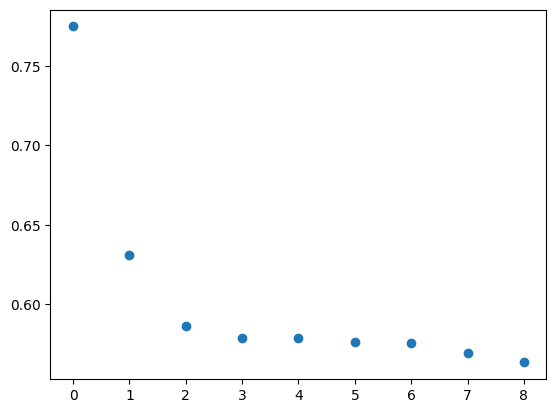

In [29]:
plt.scatter( range(0,len(autocorrelation) ), autocorrelation )
plt.show()

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, acf

In [31]:
result = acf( tempDF['Temp'] )
result

array([1.        , 0.774268  , 0.6302866 , 0.58529312, 0.57774567,
       0.57728013, 0.57510412, 0.57437039, 0.56782622, 0.56120131,
       0.54668689, 0.53793111, 0.54012564, 0.54247126, 0.53688723,
       0.53429917, 0.53043593, 0.52911166, 0.53037444, 0.52280732,
       0.52303677, 0.52224579, 0.51426684, 0.49837745, 0.49302665,
       0.49946731, 0.50428521, 0.50068173, 0.49157081, 0.48146406,
       0.47421245, 0.47568054, 0.46311862, 0.46215585, 0.46630567,
       0.45459092])

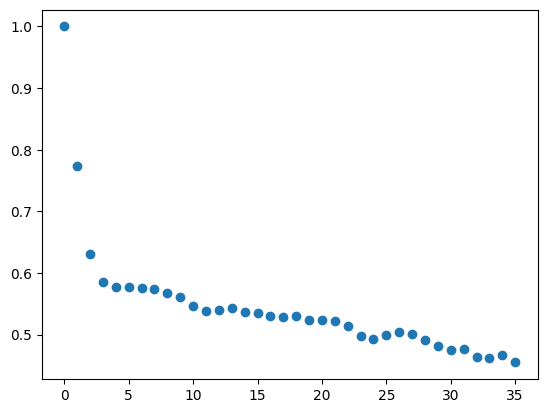

In [32]:
plt.scatter( range(0,len(result) ), result)
plt.show()

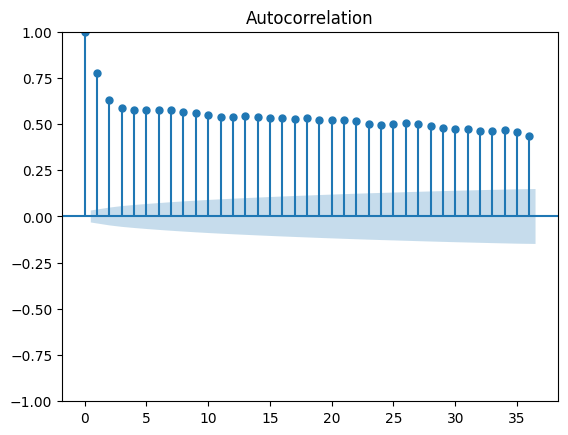

In [33]:
plot_acf( tempDF['Temp'] )
plt.show()

adfuller 판단지표
- 검증조건( p-value:5% 이내면 기각)
- 귀무가설(HO):non-stationary
- 데체가설(H1):stationary     

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
result = adfuller( birthDF['Births'])
print( result )
print('----------------')
print( result[0]) # adf (적을수록:귀무가설을 기각시킬 확률이 높다)
print( result[1]) # p-value  귀무가설 기각

(-4.808291253559763, 5.243412990149865e-05, 6, 358, {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}, 2343.8290926464197)
----------------
-4.808291253559763
5.243412990149865e-05


In [36]:
result = adfuller( airDF['passengers'])
print( result )
print('----------------')
print( result[0]) # adf (적을수록:귀무가설을 기각시킬 확률이 높다)
print( result[1])

(0.8153688792060482, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
----------------
0.8153688792060482
0.991880243437641


In [37]:
import statsmodels as sm

In [38]:
sm.__version__

'0.14.0'

In [39]:
from statsmodels.tsa.arima.model import ARIMA

In [40]:
model = ARIMA( airDF, order= (2,1,2) )
rfit = model.fit()

C:\Users\NT551XCJ\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\NT551XCJ\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\NT551XCJ\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\NT551XCJ\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
rfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Thu, 12 Oct 2023   AIC                           1353.347
Time:                        13:43:53   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.059      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.419      0.000      -0.989      -0.921
ma.L1         -1.8432      0.125    -14.798      0.000      -2.087      -1.599
ma.L2          0.9953      0.135      7.374      0.000       0.731       1.260
sigma2       665.9568    114.104      5.836      0.000     442.317     889.597
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.59   Prob(JB):                         0.40
Heteroskedasticity (H):               7.38   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARIMA(2,1,2)
\begin{equation}
y_t = 1.6850 y'_{t-1} -0.9548 y'_{t-2} + e_t -1.8432e_{t-1} +0.9953e_{t-2}
\end{equation}
</h3>
를 따르는 ARIMA모델임을 확인할 수 있다.

In [42]:
rfit.aic

1353.3466404237101

In [43]:
from warnings import filterwarnings
filterwarnings("ignore")

In [44]:
def arima_aic_check(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p:{p} d:{d} q:{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [45]:
arima_aic_check( airDF, [3,3,3] )

,order,AIC
23,p:2 d:1 q:2,1353.346640
22,p:2 d:1 q:1,1378.338320
14,p:1 d:1 q:2,1385.497545
17,p:1 d:2 q:2,1391.908433
26,p:2 d:2 q:2,1392.656889
25,p:2 d:2 q:1,1393.886573
8,p:0 d:2 q:2,1394.372844
13,p:1 d:1 q:1,1394.682505
21,p:2 d:1 q:0,1396.587695
5,p:0 d:1 q:2,1397.093462


In [46]:
rfit.predict(1,10,typ='levels')

1949-02-01    112.032226
1949-03-01    119.536465
1949-04-01    135.567081
1949-05-01    127.820745
1949-06-01    116.250011
1949-07-01    133.165958
1949-08-01    145.789980
1949-09-01    142.843117
1949-10-01    129.020075
1949-11-01    113.254645
Freq: MS, Name: predicted_mean, dtype: float64

In [47]:
rfit.predict('1950-01-01','1950-12-01',typ='levels')

1950-01-01    121.157048
1950-02-01    120.594866
1950-03-01    132.839979
1950-04-01    146.351172
1950-05-01    137.425608
1950-06-01    125.610372
1950-07-01    146.731303
1950-08-01    162.647133
1950-09-01    158.158697
1950-10-01    144.754932
1950-11-01    122.915796
1950-12-01    110.901138
Freq: MS, Name: predicted_mean, dtype: float64

In [48]:
pred = rfit.predict('1960-07-01','1961-07-01',typ='levels')
pred

1960-07-01    539.260368
1960-08-01    594.968079
1960-09-01    557.268304
1960-10-01    459.378053
1960-11-01    423.852501
1960-12-01    378.932323
1961-01-01    439.855344
1961-02-01    465.297276
1961-03-01    500.666674
1961-04-01    535.971564
1961-05-01    561.688584
1961-06-01    571.311503
1961-07-01    562.970543
Freq: MS, Name: predicted_mean, dtype: float64

In [49]:
train = airDF.loc[:'1960-07-01']
test = airDF.loc['1960-07-01':]

In [50]:
test

,passengers
time,
1960-07-01,622
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


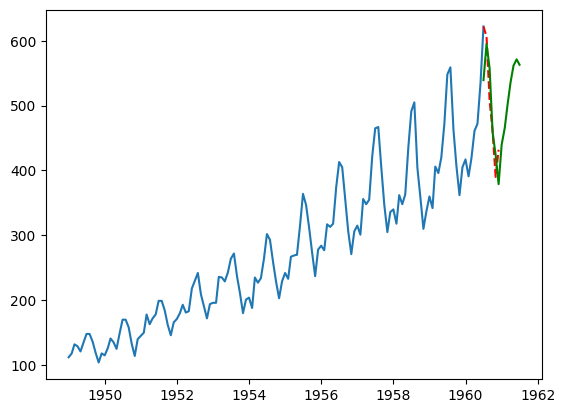

In [51]:
plt.plot( train)
plt.plot( test,'r--')
plt.plot( pred ,'g-')
plt.show()

In [52]:
airDF

,passengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## 과제

- 1.acf
- 2.adfuller:
- 3. p, d, q 값
- 4. arima 모델로
- 예측( 2001-11-13, 2001-11-20)
- 실제값 예측값을 그래프로 그리시요.

In [55]:
df = pd.DataFrame([
        ['2001-11-01', 0.998543],
        ['2001-11-02', 1.914526],
        ['2001-11-03', 3.057407],
        ['2001-11-04', 4.044301],
        ['2001-11-05', 4.952441],
        ['2001-11-06', 6.002932],
        ['2001-11-07', 6.930134],
        ['2001-11-08', 8.011137],
        ['2001-11-09', 9.040393],
        ['2001-11-10', 10.097007],
        ['2001-11-11', 11.063742],
        ['2001-11-12', 12.051951],
        ['2001-11-13', 13.062637],
        ['2001-11-14', 14.086016],
        ['2001-11-15', 15.096826],
        ['2001-11-16', 15.944886],
        ['2001-11-17', 17.027107],
        ['2001-11-18', 17.930240],
        ['2001-11-19', 18.984202],
        ['2001-11-20', 19.971603]
    ], columns=['date', 'count'])
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df = df.set_index('date')
print(df)

                count
date                 
2001-11-01   0.998543
2001-11-02   1.914526
2001-11-03   3.057407
2001-11-04   4.044301
2001-11-05   4.952441
2001-11-06   6.002932
2001-11-07   6.930134
2001-11-08   8.011137
2001-11-09   9.040393
2001-11-10  10.097007
2001-11-11  11.063742
2001-11-12  12.051951
2001-11-13  13.062637
2001-11-14  14.086016
2001-11-15  15.096826
2001-11-16  15.944886
2001-11-17  17.027107
2001-11-18  17.930240
2001-11-19  18.984202
2001-11-20  19.971603
